In [ ]:
# load in libraries we will use later
try:
  from networkx import Graph
except:
  !pip install networkx
  !pip install matplotlib
  from networkx import Graph
  from networkx import draw_networkx as draw

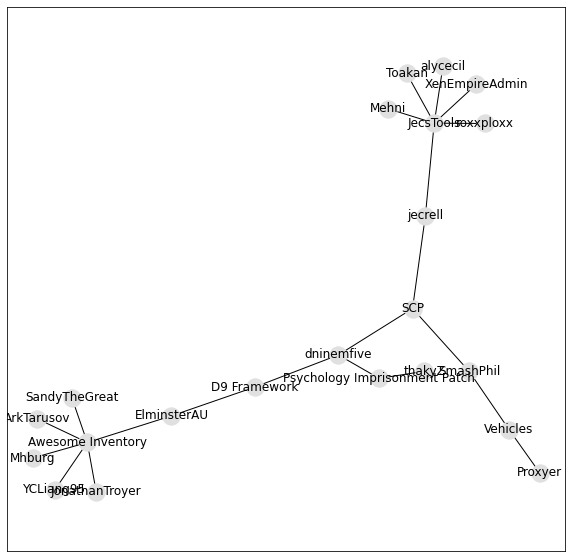

2


In [ ]:
# test graph drawing
from networkx import draw_networkx as draw
import matplotlib.pyplot as plt
G = Graph()
G.add_node('dninemfive')
G.add_node('D9 Framework')
G.add_edge('dninemfive', 'D9 Framework')
G.add_edge('ElminsterAU', 'D9 Framework')
G.add_node('Awesome Inventory')
G.add_edge('ElminsterAU', 'Awesome Inventory')
G.add_edge('Mhburg', 'Awesome Inventory')
G.add_edge('SandyTheGreat', 'Awesome Inventory')
G.add_edge('YCLiang95', 'Awesome Inventory')
G.add_edge('JonathanTroyer', 'Awesome Inventory')
G.add_edge('ArkTarusov', 'Awesome Inventory')
G.add_node('Psychology Imprisonment Patch')
G.add_edge('dninemfive', 'Psychology Imprisonment Patch')
G.add_node('thakyZ')
G.add_edge('thakyZ', 'Psychology Imprisonment Patch')
G.add_node('SCP')
G.add_edge('dninemfive', 'SCP')
G.add_edge('SmashPhil', 'SCP')
G.add_edge('jecrell', 'SCP')
G.add_edge('jecrell', 'JecsTools')
G.add_edge('JecsTools', 'alycecil')
G.add_edge('JecsTools', 'roxxploxx')
G.add_edge('JecsTools', 'Toakan')
G.add_edge('JecsTools', 'XenEmpireAdmin')
G.add_edge('JecsTools', 'Mehni')
G.add_edge('Vehicles', 'SmashPhil')
G.add_edge('Vehicles', 'Proxyer')
plt.figure(figsize=(10,10))
draw(G, node_color='#e0e0e0')
plt.axis("equal")
plt.show()
print(nx.shortest_path_length(G, 'dninemfive', 'ElminsterAU'))

Input your username: dninemfive
Input OAuth token: ··········
Input target user: dninemfive
Input degrees of relation to search: 1
depth 0
getting repos from https://api.github.com/users/dninemfive/repos...
	response received.
	processing...
		Repo advancedshieldbelts, contributors: [User dninemfive]
		Repo ajoclassic, contributors: [User dninemfive]
		Repo ajocollection, contributors: [User dninemfive]
		Repo ajolite, contributors: [User dninemfive]
		Repo ambrosiallongevity, contributors: [User dninemfive]
		Repo america-gwb, contributors: [User dninemfive]
		Repo botswana-civ, contributors: [User dninemfive]
		Repo chickenscenparts, contributors: [User dninemfive]
		Repo ctm, contributors: [User dninemfive]
		Repo customclimatecycle, contributors: [User dninemfive]
		Repo d9framework, contributors: [User dninemfive, User ElminsterAU]
		Repo deconstructreturnfix, contributors: [User dninemfive, User Tobe-Continued]
		Repo dninemfive.github.io, contributors: [User dninemfive]
		Repo e

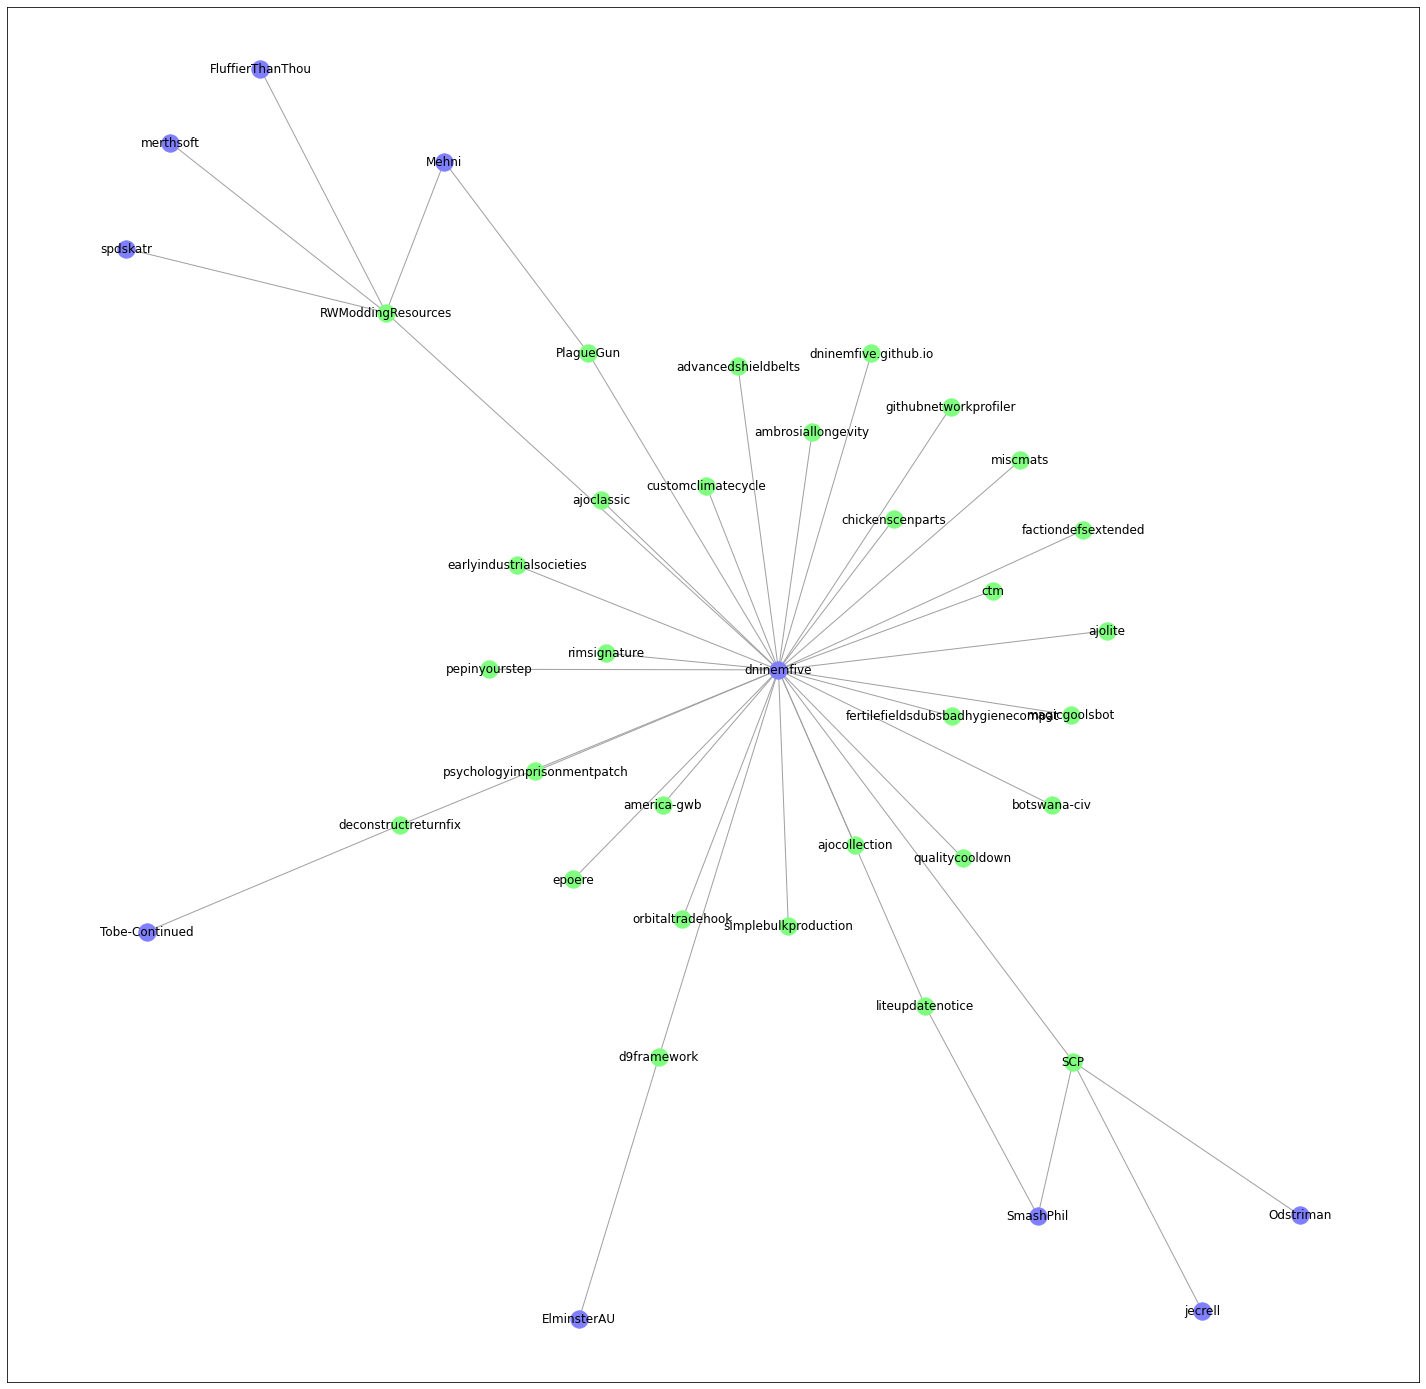

In [ ]:
# last working version
from networkx import draw_networkx as draw
from networkx import Graph
import networkx as nx
import matplotlib.pyplot as plt
import requests
import json
import getpass
import numbers
import math

def get_collaborators(user, degrees_remaining):
  pass

def get_repos(url, min_contributors=2):
  """Takes a Github repo url and returns a list of Repo objects, discarding any with fewer contributors than min_contributors."""
  print('getting repos from ' + url + '...')
  response = requests.get(url, {'type': 'all'}, auth=(username, token))
  print('\tresponse received.')
  jason = json.loads(response.text)
  repos = []
  print('\tprocessing...')
  for j in jason:
    temp = Repo(j)
    print('\t\t' + repr(temp))
    if temp.num_contributors >= min_contributors: repos.append(temp)
  print('done!')
  return repos

class Repo:
  def __init__(self, jsn):
    self.name = jsn['name']
    self.contributors = []
    try:
      for userJsn in json.loads(requests.get(jsn['contributors_url'], {'affiliation': 'all'}, auth=(username, token)).text):
        self.contributors.append(User(userJsn))
    except:
      pass

  def __repr__(self):
    return 'Repo ' + self.name + ', contributors: ' + repr(self.contributors)

  @property
  def name_for_graph(self):
    return 'r ' + self.name

  @property
  def num_contributors(self):
    return len(self.contributors)

class User:
  def __init__(self, jsn):
    self.name = jsn['login']
    self.repos_url = jsn['repos_url']
  
  def __repr__(self):
    return "User " + self.name

  @property
  def name_for_graph(self):
    return 'u ' + self.name

def already_profiled(user):
  for cur in profiled_users:
    if user.name == cur: return True
  return False

# TODO: input validation. Verify that target user exists and that max_degrees is a number.
# Also, make sure username and OAuth are valid before continuing
username = input("Input your username: ")
token = getpass.getpass("Input OAuth token: ")
target_user = input("Input target user: ")
max_depth = int(input("Input degrees of relation to search: "))
g = Graph()
reposet, userset, profiled_users = set(), set(), set()
users_to_profile_next = set([target_user])
for depth in range(max_depth):
  print('depth ' + str(depth))
  users_to_profile = users_to_profile_next
  users_to_profile_next = set()
  for cur_target in users_to_profile:
    if len(cur_target) < 1: continue
    profiled_users.add(cur_target)
    for repo in get_repos('https://api.github.com/users/' + cur_target + '/repos'):
      reposet.add(repo.name_for_graph)
      for user in repo.contributors:
        userset.add(user.name_for_graph)
        if not already_profiled(user): users_to_profile_next.add(user.name)
        g.add_edge(user.name_for_graph, repo.name_for_graph)
print('data collected.')
w = 4 * math.sqrt(len(g))
h = w
plt.figure(figsize=(w,h))
pos = nx.spring_layout(g)
nx.draw_networkx_nodes(g, pos, nodelist=reposet, node_color='#80ff80')
nx.draw_networkx_nodes(g, pos, nodelist=userset, node_color='#8080ff')
nx.draw_networkx_edges(g, pos, edge_color='#a0a0a0')
labels = {}
for r in reposet:
  labels[r] = r.replace('r ','',1)
for u in userset:
  labels[u] = u.replace('u ','',1)
nx.draw_networkx_labels(g, pos, labels)
plt.axis("equal")
plt.show()

In [ ]:
# test github API
import requests
import json
import getpass
username = input("Input username: ")
token = getpass.getpass("Input OAuth token: ")
response = requests.get('https://api.github.com/users/dninemfive/repos', {'type': 'all'}, auth=(username, token))
if response.status_code == 200:
  jsn = json.loads(response.text)
  for repo in jsn:
    # print(repo['name'])
    if repo['name'] == 'simplebulkproduction':
      print(json.loads(requests.get(repo['contributors_url'], {'affiliation': 'all'}, auth=(username, token)).text))
else: print("Response: " + response.status_code)

Input username: dninemfive
Input OAuth token: ··········
[{'login': 'dninemfive', 'id': 11084010, 'node_id': 'MDQ6VXNlcjExMDg0MDEw', 'avatar_url': 'https://avatars0.githubusercontent.com/u/11084010?v=4', 'gravatar_id': '', 'url': 'https://api.github.com/users/dninemfive', 'html_url': 'https://github.com/dninemfive', 'followers_url': 'https://api.github.com/users/dninemfive/followers', 'following_url': 'https://api.github.com/users/dninemfive/following{/other_user}', 'gists_url': 'https://api.github.com/users/dninemfive/gists{/gist_id}', 'starred_url': 'https://api.github.com/users/dninemfive/starred{/owner}{/repo}', 'subscriptions_url': 'https://api.github.com/users/dninemfive/subscriptions', 'organizations_url': 'https://api.github.com/users/dninemfive/orgs', 'repos_url': 'https://api.github.com/users/dninemfive/repos', 'events_url': 'https://api.github.com/users/dninemfive/events{/privacy}', 'received_events_url': 'https://api.github.com/users/dninemfive/received_events', 'type': 'Us

In [38]:
# final version before rewrite
from networkx import draw_networkx as draw
from networkx import Graph
import networkx as nx
import matplotlib.pyplot as plt
import requests
import json
import getpass
import numbers
import math

def get_repos(url, min_contributors=2):
  """Takes a Github repo url and returns a list of Repo objects, discarding any with fewer contributors than min_contributors."""
  print('getting repos from ' + url + '...')
  response = requests.get(url, {'type': 'all'}, auth=(username, token))
  if response.status_code == 200:
    print('\tresponse received, code ' + str(response.status_code))
  else:
    print('\tresponse received, code ' + str(response.status_code) + ':\n' + repr(json.loads(response.text)))
    return []
  jason = json.loads(response.text)
  repos = []
  print('\tprocessing...')
  for j in jason:
    try:
      a = j['name']
    except:
      continue
    temp = Repo(j)
    print('\t\t' + repr(temp))
    # if not (remove_non_contiguous and User() in temp.contributors) and temp.num_contributors >= min_contributors: repos.append(temp)
    if temp.num_contributors >= min_contributors: repos.append(temp)
  print('done!')
  return repos

class Repo:
  def __init__(self, jsn):
    self.name = jsn['name']
    self.contributors = []
    try:
      for userJsn in json.loads(requests.get(jsn['contributors_url'], {'affiliation': 'all'}, auth=(username, token)).text):
        self.contributors.append(User(userJsn))
    except:
      pass

  def __repr__(self):
    return 'Repo ' + self.name + ', contributors: ' + repr(self.contributors)

  @property
  def name_for_graph(self):
    return 'r ' + self.name

  @property
  def num_contributors(self):
    return len(self.contributors)

class User:
  def __init__(self, jsn=None):
    if(jsn == None):
      self.name = target_user
      self.repos_url = 'https://api.github.com/users/' + target_user + '/repos'
    else:
      self.name = jsn['login']
      self.repos_url = jsn['repos_url']
  
  def __repr__(self):
    return "User " + self.name

  def __eq__(self, other):
    return self.name == other.name

  @property
  def name_for_graph(self):
    return 'u ' + self.name

def already_profiled(user, profiled_users):
  for cur in profiled_users:
    if user.name == cur: return True
  return False

def get_dist(graph, source, target):
  try:
    return nx.shortest_path_length(graph, source, target)
  except:
    return -1

def ask_for_max_depth():
  try:
    return int(input("Input maximum depth: "))
  except:
    print('Max depth must be a number!')
    return ask_for_max_depth()

def do_program():
  g = Graph()
  reposet, userset, profiled_users = set(), set(), set()
  users_to_profile_next = set([target_user])
  for depth in range(max_depth):
    users_to_profile = users_to_profile_next
    users_to_profile_next = set()
    print('depth ' + str(depth) + ' (users: ' + str(len(users_to_profile)) + ')')    
    ct = 1
    for cur_target in users_to_profile:
      print('user ' + str(ct) + '/' + str(len(users_to_profile)))
      if len(cur_target) < 1: continue
      profiled_users.add(cur_target)
      for repo in get_repos('https://api.github.com/users/' + cur_target + '/repos'):
        reposet.add(repo.name_for_graph)
        for user in repo.contributors:
          userset.add(user.name_for_graph)
          if not already_profiled(user, profiled_users): users_to_profile_next.add(user.name)
          g.add_edge(user.name_for_graph, repo.name_for_graph)
      ct += 1
  print('data collected.\nprocessing...')
  labels = {}
  print('\tremoving discontiguous regions...')
  target_user_key = 'u ' + target_user
  remove_from_reposet = set()
  for r in reposet:
    if remove_non_contiguous and get_dist(g, target_user_key, r) == -1:
      try:
        g.remove_node(r)
        remove_from_reposet.add(r)      
      except:
        print('\t\ttried to remove node ' + r + ", but it didn't exist!")
      continue
    labels[r] = r.replace('r ','',1)
  for r in remove_from_reposet: reposet.remove(r)
  remove_from_userset = set()
  for u in userset:
    dist = get_dist(g, 'u ' + target_user, u)
    if remove_non_contiguous and dist == -1:
      try:
        g.remove_node(u)
        remove_from_userset.add(u)      
      except:
        print('\t\ttried to remove node ' + u + ", but it didn't exist!")
      continue
    labels[u] = u.replace('u ','',1) + ' (' + str(dist//2) + ')'
  for u in remove_from_userset: userset.remove(u)
  w = 4 * math.sqrt(len(g))
  if w <= 0: w = 1
  h = w
  plt.figure(figsize=(w,h))
  print('\tdoing layout...')
  pos = nx.spring_layout(g)
  print('\t\tdone.')
  nx.draw_networkx_nodes(g, pos, nodelist=reposet, node_color='#80ff80')
  nx.draw_networkx_nodes(g, pos, nodelist=userset, node_color='#8080ff')  
  nx.draw_networkx_edges(g, pos, edge_color='#a0a0a0')
  nx.draw_networkx_labels(g, pos, labels)
  plt.axis("equal")
  plt.show()

username = input("Input your username: ")
token = getpass.getpass("Input OAuth token: ")
# validate username/OAuth combination
response_code = requests.get('https://api.github.com/users/' + username + '/repos', {'type': 'all'}, auth=(username, token)).status_code
while(not response_code == 200):
  print('Username and/or OAuth token invalid, code ' + str(response_code))
  username = input("Input your username: ")
  token = getpass.getpass("Input OAuth token: ")
  response_code = requests.get('https://api.github.com/users/' + username + '/repos', {'type': 'all'}, auth=(username, token)).status_code
target_user = input("Input target user: ")
response_code = requests.get('https://api.github.com/users/' + target_user + '/repos', {'type': 'all'}, auth=(username, token)).status_code
while(not response_code == 200):
  print('Invalid target user, code ' + str(response_code))
  target_user = input("Input target user: ")
  response_code = requests.get('https://api.github.com/users/' + target_user + '/repos', {'type': 'all'}, auth=(username, token)).status_code
max_depth = ask_for_max_depth()
print("You generally want to remove non-contiguous networks, they tend to add more clutter rather than being helpful.")
remove_in = input('Remove non-contiguous networks? y/n: ')
remove_non_contiguous = len(remove_in) < 1 or not remove_in.lower()[0] == 'n'
do_program()

Input your username: dninemfive
Input OAuth token: ··········
Input target user: dninemfive
Input maximum depth: 2
You generally want to remove non-contiguous networks, they tend to add more clutter rather than being helpful.


KeyboardInterrupt: ignored

Input your username: dninemfive
Input OAuth token: ··········
Logged in as dninemfive. You have 4411 requests remaining.
Input target user: dninemfive
Input maximum depth: 2
getting target user dninemfive (depth 0)
getting repos from https://api.github.com/users/dninemfive/repos...
	response received, code 200
	processing...
done!
dninemfive
	Repo d9framework, contributors: [User dninemfive, User ElminsterAU]
	Repo deconstructreturnfix, contributors: [User dninemfive, User Tobe-Continued]
	Repo liteupdatenotice, contributors: [User dninemfive, User SmashPhil]
	Repo PlagueGun, contributors: [User dninemfive, User Mehni]
	Repo RWModdingResources, contributors: [User Mehni, User spdskatr, User FluffierThanThou, User merthsoft, User dninemfive]
	Repo SCP, contributors: [User jecrell, User dninemfive, User Odstriman, User SmashPhil]
depth 1 (users: 9)
user 1/9
getting repos from https://api.github.com/users/Tobe-Continued/repos...
	response received, code 200
	processing...
done!
discarded 

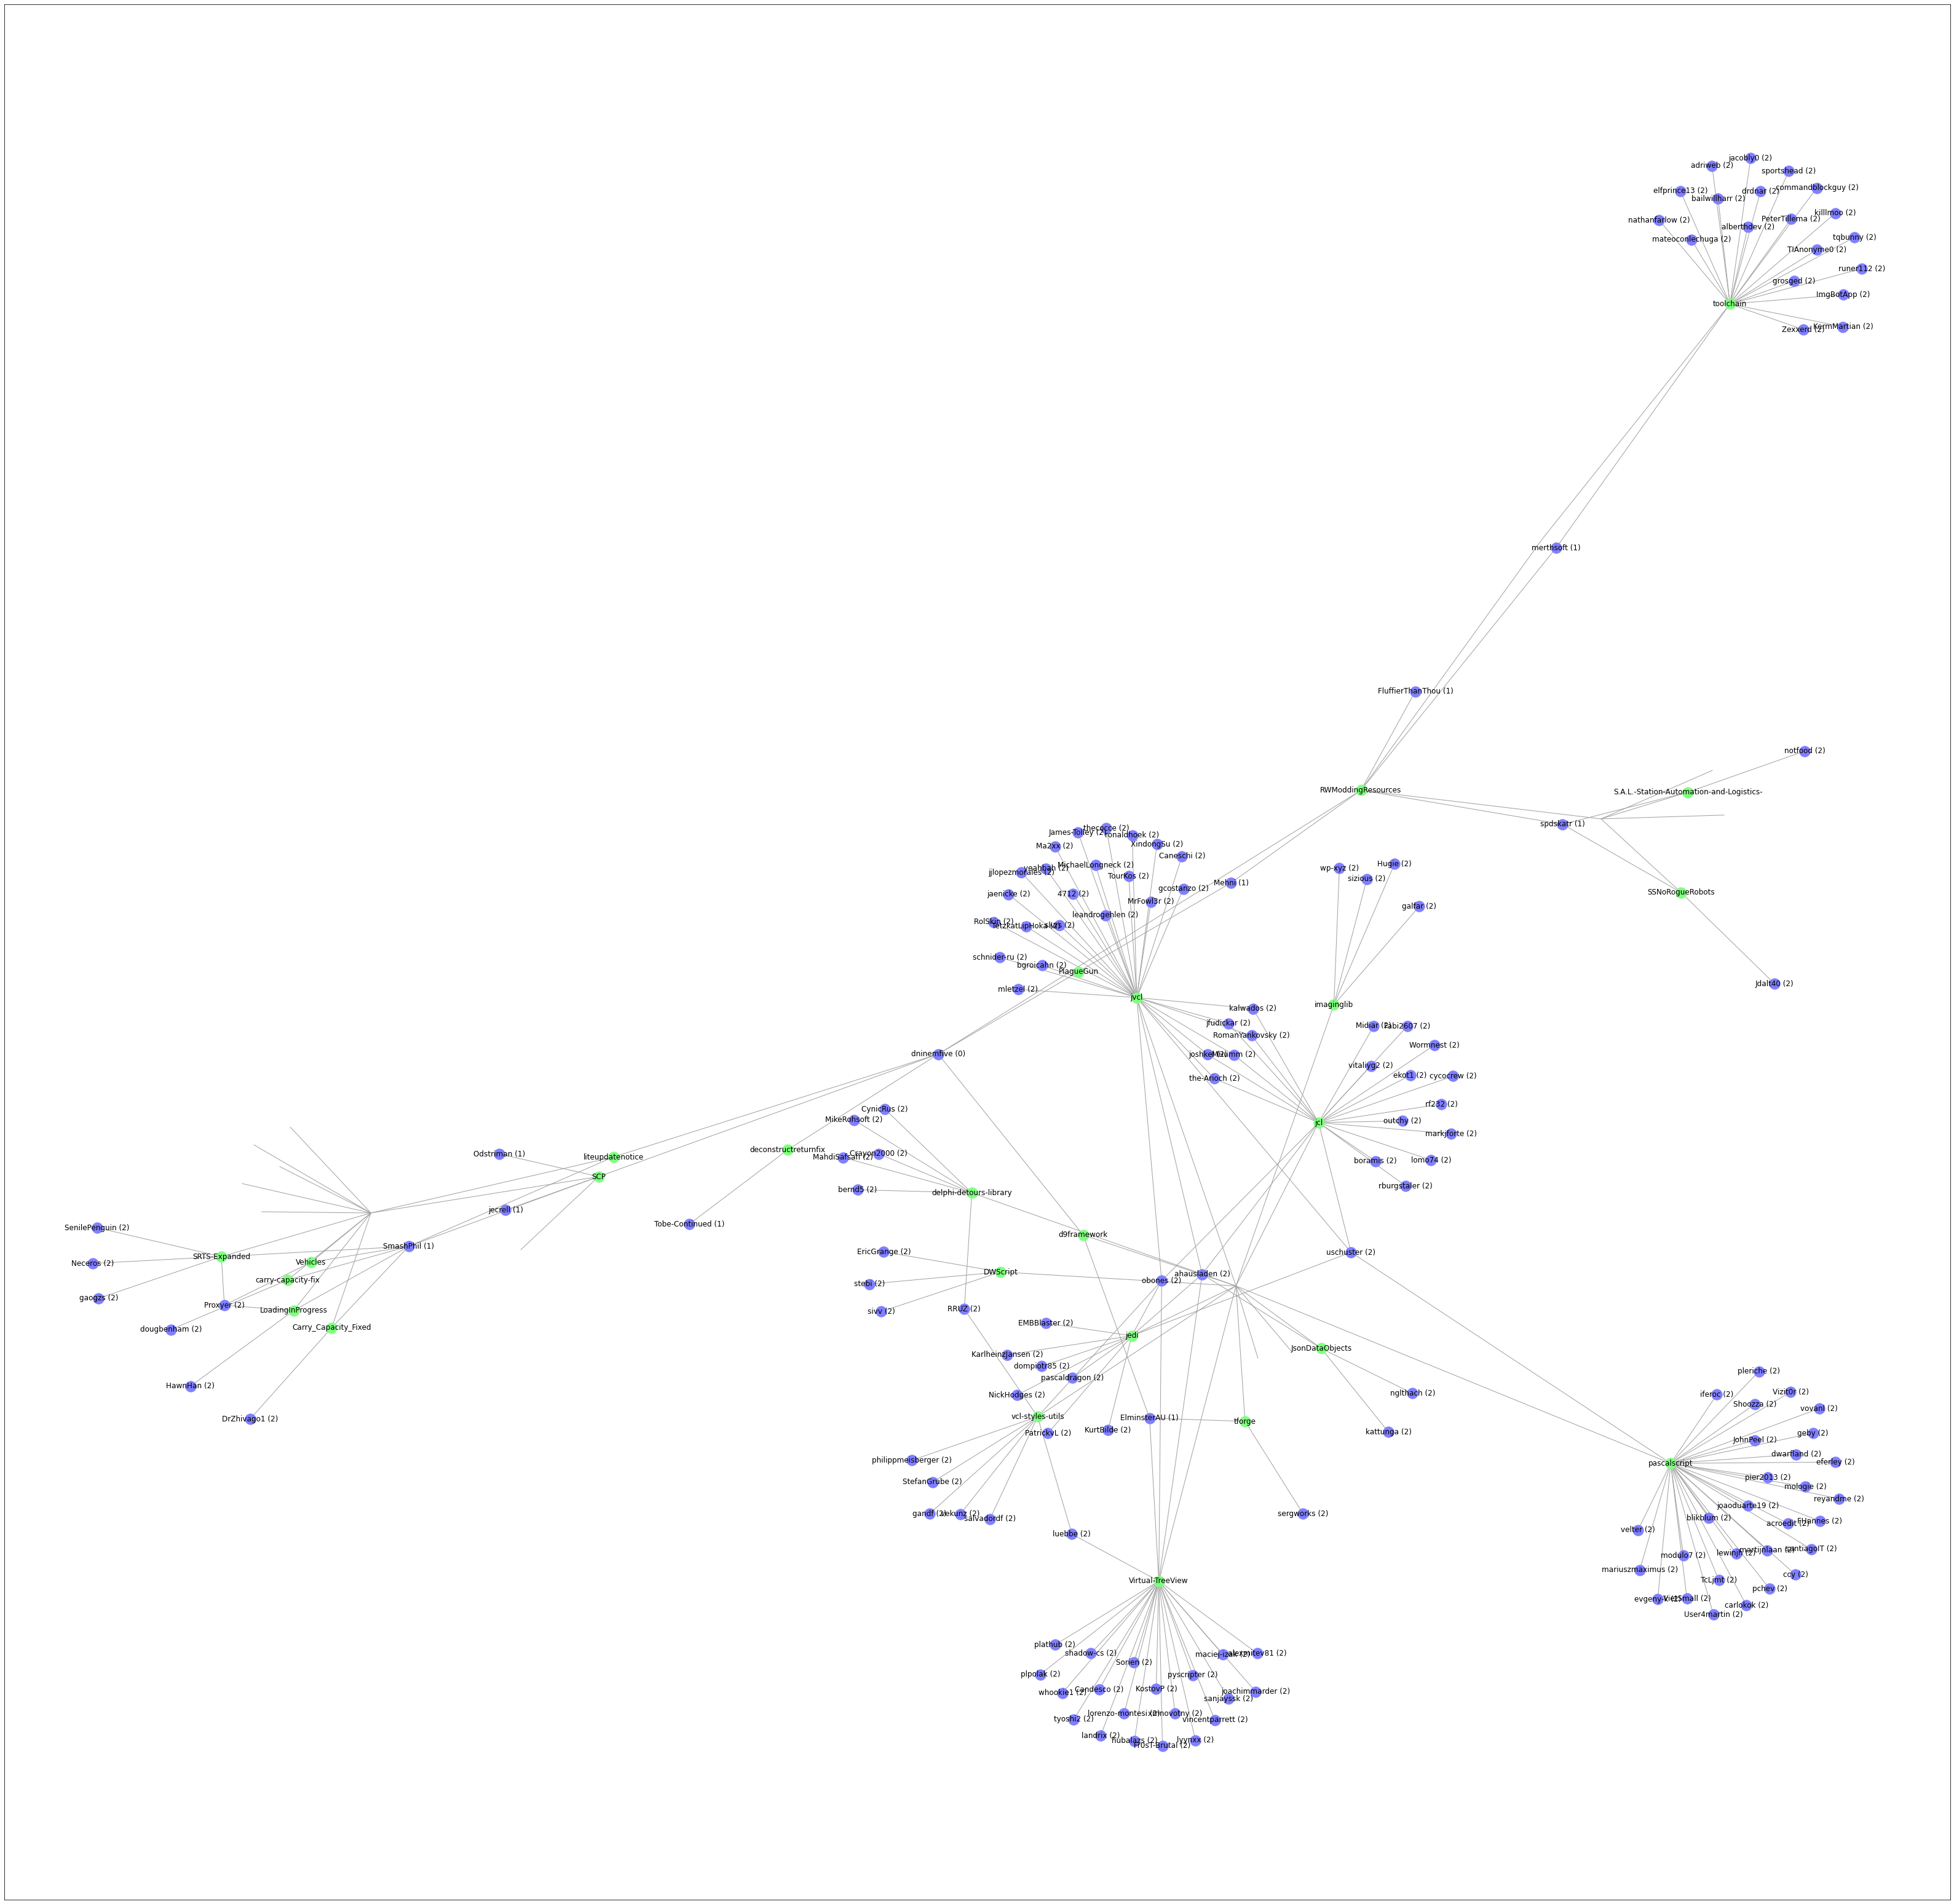

In [42]:
# rewrite in a more optimized manner
# will construct the graph in real time rather than at the end, so we can check if users are connected before profiling them
from networkx import Graph
import networkx as nx
import matplotlib.pyplot as plt
import requests
import json
import getpass
import numbers
import math
from datetime import datetime

# classes
class Repo:
  """
    Class representing a Github repo.

    Attributes:
      name : str
        name of the repo, i.e. the 'name' value of the API response
      jsn : Dict
        json response
      contributors : List<User>
        list of User objects listed under the 'contributor' value of the API response, empty if the response has no contribs or is empty

    Properties:
      name_for_graph : str
        returns the repo name plus a unique string which prevents it from being merged into a user.
      num_contributors : int
        returns the length of the contributors attribute, for better code readability
  """
  def __init__(self, jsn):
    """
    Constructs a Repo object.

    Arguments:
      jsn : str
        The JSON contents of an element from the Github API response to a request for a user's repos.
        If null or otherwise erroring when treated as a dictionary after being loaded using the built-in JSON parser, the invalid property will be set.
    """
    try:
      self.name = jsn['name']
      self.jsn = jsn
      self.contributors = 'not initialized'
    except:
      print('Exception initializing Repo, jsn = ' + repr(json))

  def __repr__(self):
    return 'Repo ' + self.name + ', contributors: ' + repr(self.contributors)

  def get_user_by_name(self, username):
    for user in self.contributors:
      if user.name == username: return user
    return -1

  def get_contributors(self, login):
    self.contributors = []
    request = requests.get(self.jsn['contributors_url'], {'affiliation': 'all'}, auth=login)
    if request.status_code == 200:
      try:
        for userJsn in json.loads(request.text):
          self.contributors.append(User(userJsn))
      except:
        print('could not parse ' + repr(json.loads(request)))
    else:
      print('Error getting users for repo ' + self.name + ': response code ' + str(request.status_code) + '; message: ' + str(json.loads(request.text)['message']))

  @property
  def name_for_graph(self):
    """returns the repo name plus a unique string which prevents it from being merged into a user"""
    return 'r ' + self.name

  @property
  def num_contributors(self):
    if isinstance(self.contributors, str): return -1
    return len(self.contributors)

class User:
  """
  Class representing a Github user.

  Attributes:
      name : str
        name of the repo, i.e. the 'login' value of the API response or the value of 'target_user' if no JSON is specified.
      repos_url : str
        the repo of the target's url, either from jsn or from a generic string version

    Properties:
      name_for_graph : str
        returns the repo name plus a unique string which prevents it from being merged into a user.
  """
  def __init__(self, jsn=None):
    if(jsn == None):
      self.name = target_user
      self.repos_url = 'https://api.github.com/users/' + target_user + '/repos'
    else:
      self.name = jsn['login']
      self.repos_url = jsn['repos_url']
  
  def __repr__(self):
    return "User " + self.name

  def __eq__(self, other):
    return self.name == other.name

  @property
  def name_for_graph(self):
    return 'u ' + self.name

# utility methods
def debug_print(s):
  """ 
  Prints the specified string if the global variable 'debug' is True, otherwise does nothing

  Arguments:
    s : str
      the string to print  
  """
  try:
    if debug: print(s)
  except:
    pass

def get_repos(url, login, target_user=None, min_contributors=2):
  """Takes a Github user url and returns a list of Repo objects."""
  print('getting repos from ' + url + '...')
  response = requests.get(url, {'type': 'all'}, auth=login)
  if response.status_code == 200:
    print('\tresponse received, code ' + str(response.status_code))
  else:
    print('\tresponse received, code ' + str(response.status_code) + ':\n' + repr(json.loads(response.text)))
    return []
  jason = json.loads(response.text)
  repos = []
  print('\tprocessing...')
  for j in jason:    
    try: # if the response is invalid, discard
      a = j['name']
    except:
      continue
    temp = Repo(j)
    # print('\t\t' + repr(temp))
    # if not (remove_non_contiguous and User() in temp.contributors) and temp.num_contributors >= min_contributors: repos.append(temp)
    # if temp.num_contributors >= min_contributors: repos.append(temp)
    # should be handled later now
    repos.append(temp)
  print('done!')
  if target_user is not None:
    # get a pseudorandom element of the set
    random = ''
    for repo in repos:
      random = repo
      break
    random.get_contributors(login)
    print(target_user)
    target_user_User = random.get_user_by_name(target_user)
    return (repos, target_user_User)
  else:
    return repos

def already_profiled(user, profiled_users):
  for cur in profiled_users:
    if user.name == cur: return True
  return False

def get_dist(graph, source, target):
  try:
    return nx.shortest_path_length(graph, source, target)
  except:
    return -1

# methods called in sequence for the program
def get_login():
  username = input("Input your username: ")
  token = getpass.getpass("Input OAuth token: ")
  request = requests.get('https://api.github.com/users/' + username + '/repos', {'type': 'all'}, auth=(username, token))
  while(not request.status_code == 200):
    print('Username and/or OAuth token invalid, code ' + str(response_code))
    username = input("Input your username: ")
    token = getpass.getpass("Input OAuth token: ")
    request = requests.get('https://api.github.com/users/' + username + '/repos', {'type': 'all'}, auth=(username, token))
  print('Logged in as ' + username + '. You have ' + str(request.headers['X-RateLimit-Remaining']) + ' requests remaining.')
  return (username, token)

def get_target_user(login):
  target_user = input("Input target user: ")
  response = requests.get('https://api.github.com/users/' + target_user + '/repos', {'type': 'all'}, auth=login)
  while(not response.status_code == 200):
    if response.status_code == 403:
      if int(response.headers['X-RateLimit-Remaining']) <= 0:
        dt = datetime.fromtimestamp(int(response.headers['X-RateLimit-Reset']))
        raise Exception('Response 403 received. Your account is currently rate-limited; the rate limit is scheduled to reset at ' 
                        + dt.time().strftime('%X') + ' on ' + dt.date().strftime('%x') + 
                        '. Message: ' + str(json.loads(response.text)['message']))
      raise Exception('Response 403 received.')
    print('Invalid target user, code ' + str(response.status_code))
    target_user = input("Input target user: ")
    response = requests.get('https://api.github.com/users/' + target_user + '/repos', {'type': 'all'}, auth=login)
  return target_user

def ask_for_max_depth():
  try:
    return int(input("Input maximum depth: "))
  except:
    print('Max depth must be a number!')
    return ask_for_max_depth()

def ask_remove_non_contiguous():
  print("You generally want to remove non-contiguous networks, they tend to add more clutter rather than being helpful.")
  remove_in = input('Remove non-contiguous networks? y/n: ')
  return len(remove_in) < 1 or not remove_in.lower()[0] == 'n'

def construct_graph(target_user, max_depth, login):  
  reposet, userset, profiled_users, users_to_profile_next = set(), set(), set(), set()
  g = Graph()
  # get the target user
  print('getting target user ' + target_user + ' (depth 0)')
  profiled_users.add(target_user)
  repos, target_user_User = get_repos('https://api.github.com/users/' + target_user + '/repos', login, target_user)
  for repo in repos:    
    repo.get_contributors(login)
    if repo.num_contributors < 2: continue
    reposet.add(repo.name_for_graph)
    debug_print('\t' + repr(repo))
    for user in repo.contributors:
      userset.add(user.name_for_graph)
      if not already_profiled(user, profiled_users):
        users_to_profile_next.add(user.name)
      g.add_edge(user.name_for_graph, repo.name_for_graph)
  for depth in range(1, max_depth):
    users_to_profile = users_to_profile_next
    users_to_profile_next = set()
    print('depth ' + str(depth) + ' (users: ' + str(len(users_to_profile)) + ')')    
    ct = 1
    for cur_target in users_to_profile:
      print('user ' + str(ct) + '/' + str(len(users_to_profile)))
      if len(cur_target) < 1: continue
      profiled_users.add(cur_target)
      for repo in get_repos('https://api.github.com/users/' + cur_target + '/repos', login):
        g.add_edge(cur_target, repo.name_for_graph)
        reposet.add(repo.name_for_graph)
        if get_dist(g, target_user_User.name_for_graph, repo.name_for_graph) == -1:
          reposet.remove(repo.name_for_graph)
          g.remove_node(repo.name_for_graph)
          print('discarded repo ' + repo.name + ': no path')
          continue
        repo.get_contributors(login)
        if repo.num_contributors < 2:
          reposet.remove(repo.name_for_graph)
          continue
        for user in repo.contributors:
          g.add_edge(user.name_for_graph, repo.name_for_graph)
          userset.add(user.name_for_graph)
          if get_dist(g, source=target_user_User.name_for_graph, target=user.name_for_graph) > -1:
            if not already_profiled(user, profiled_users):            
              users_to_profile_next.add(user.name)
          else:
              userset.remove(user.name_for_graph)
              g.remove_node(user.name_for_graph)
              print('discarded user ' + user.name + ', no path')
      ct += 1
  return (reposet, userset, g)

def show_graph(reposet, userset, target_user, g):
  labels = {}  
  for r in reposet:
    # potential future feature: store the number of contribs for each repo
    labels[r] = r.replace('r ','',1)
  for u in userset:
    dist = get_dist(g, 'u ' + target_user, u)
    labels[u] = u.replace('u ','',1) + ' (' + str(dist//2) + ')'
  w = 4 * math.sqrt(len(g))
  if w <= 0: w = 1
  h = w
  plt.figure(figsize=(w,h))
  print('\tdoing layout...')
  pos = nx.spring_layout(g)
  print('\t\tdone.')
  # todo: scale repos to number of commits
  nx.draw_networkx_nodes(g, pos, nodelist=reposet, node_color='#80ff80')
  nx.draw_networkx_nodes(g, pos, nodelist=userset, node_color='#8080ff')
  # missing_nodes = set(g.nodes).difference(reposet.union(userset))
  # nx.draw_networkx_nodes(g, pos, nodeset=missing_nodes, node_color='#b0b0b0')
  nx.draw_networkx_edges(g, pos, edge_color='#a0a0a0')
  nx.draw_networkx_labels(g, pos, labels)
  plt.axis("equal")
  plt.show()

def do_program():
  username, token = get_login()
  success = True
  try:
    target_user = get_target_user((username, token))
  except Exception as e:
    print('Caught exception during execution: ' + str(e))
    success = False
  if success:
    max_depth = ask_for_max_depth()
    # remove_non_contig = ask_remove_non_contiguous()
    reposet, userset, g = construct_graph(target_user, max_depth, (username, token))
    show_graph(reposet, userset, target_user, g)  

# set debug things to print
debug = True
do_program()

In [16]:
# quickly see if I can get rate limiting info
import requests
import json
import getpass
from datetime import datetime

username = input("Input your username: ")
token = getpass.getpass("Input OAuth token: ")
request = requests.get('https://api.github.com/users/' + username, {'type': 'all'}, auth=(username, token))
headers = request.headers
print('Your rate limit is ' + headers['X-RateLimit-Limit'] + ', of which ' + headers['X-RateLimit-Remaining'] + ' requests have been used. Your rate limit will reset at ' + str(datetime.fromtimestamp(int(headers['X-RateLimit-Reset']))) + '.')
dt = datetime.fromtimestamp(int(headers['X-RateLimit-Reset']))
print('at ' + dt.time().strftime('%X') + ' on ' + dt.date().strftime('%x'))

Input your username: dninemfive
Input OAuth token: ··········
Your rate limit is 5000, of which 4987 requests have been used. Your rate limit will reset at 2020-08-02 00:44:44.
at 00:44:44 on 08/02/20
